### Company Y. Afisha

A study is requested to be carried out to understand how users use the product, when they start buying, how much contribution each customer brings and when they pay.

The information provided is distributed in 3 datasets, with 2542, 50415 and 359400 records respectively.

The main objective is to optimize the company's marketing expenses, understanding and characterizing customer behavior, to in turn provide recommendations that serve marketing experts, ultimately contributing to better company performance and the generation of greater income.

## Table of Contents
* [Problem Statement](#problem)
* [Technical Requirements](#technical)
* [Data Description](#data)
* [Data Cleaning and preparation](#preparation)
* [Metric calculation](#metric)
* [Results and recommendations](#observations)
* [Conclusion](#conclusion)

 ## Problem Statement <a name="problem"></a>

This project focuses on carrying out a preliminary analysis with the data available that corresponds to the period from January 2017 to December 20218. Data, which are distributed in 3 datasets that contain information on marketing costs and/or expenses, about orders for the period and customer visits to the company's website.

 ## Technical Requirements <a name="technical"></a>

The following libraries are required:
    
1. pandas
2. numpy
3. seaborn
4. matplotlib

## Initialization 

In [105]:
# Loading libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from importlib import reload
plt=reload(plt)

In [106]:
# Loading datasets -1 

df_marketing_cost = pd.read_csv('costs_us.csv')

In [107]:
# Loading datasets -2 

df_marketing_orders = pd.read_csv('orders_log_us.csv')

In [108]:
# Loading datasets -3 

df_marketing_visits = pd.read_csv('visits_log_us.csv')

 ## Data Description <a name="data"></a>

## Dataset 1

In [109]:
df_marketing_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [110]:
df_marketing_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [111]:
df_marketing_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [112]:
df_marketing_cost.columns

Index(['source_id', 'dt', 'costs'], dtype='object')

In [113]:
df_marketing_orders.columns

Index(['Buy Ts', 'Revenue', 'Uid'], dtype='object')

In [114]:
df_marketing_visits.columns

Index(['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid'], dtype='object')

In [115]:
df_marketing_cost.shape

(2542, 3)

In [116]:
df_marketing_orders.shape

(50415, 3)

In [117]:
df_marketing_visits.shape

(359400, 5)

In [118]:
df_marketing_cost.head(5)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [119]:
df_marketing_orders.head(5)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [120]:
df_marketing_visits.head(5)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [121]:
df_marketing_cost.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [122]:
df_marketing_orders.describe()

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [123]:
df_marketing_visits.describe()

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


## Data Cleaning and Preparation  <a name="preparation"></a>

### Verification and correction of data types

In [124]:
# Converting the date feature to the most appropriate data type

df_marketing_cost['dt'] = pd.to_datetime(df_marketing_cost['dt'])

In [125]:
# Converting the date feature to the most appropriate data type

df_marketing_orders['Buy Ts'] = pd.to_datetime(df_marketing_orders['Buy Ts'])

In [126]:
# Converting the date feature to the most appropriate data type

df_marketing_visits['Start Ts'] = pd.to_datetime(df_marketing_visits['Start Ts'])
df_marketing_visits['End Ts'] = pd.to_datetime(df_marketing_visits['End Ts'])

In [127]:
df_marketing_visits['Device'].value_counts()

Device
desktop    262567
touch       96833
Name: count, dtype: int64

In [128]:
df_marketing_visits['Device'] = df_marketing_visits['Device'].astype('category') 

In [129]:
df_marketing_visits['Device'].value_counts()

Device
desktop    262567
touch       96833
Name: count, dtype: int64

### Checking converted data types

In [130]:
df_marketing_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [131]:
df_marketing_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [132]:
df_marketing_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


### Converting data feature names to lowercase

In [133]:
# ALL column names are replaced with lowercase letters.

df_marketing_cost.columns = map(str.lower, df_marketing_cost.columns)
df_marketing_cost.head(5)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [134]:
df_marketing_cost['source_id'].unique()

array([ 1,  2,  3,  4,  5,  9, 10], dtype=int64)

In [135]:
df_marketing_orders.columns = map(str.lower, df_marketing_orders.columns)
df_marketing_orders.head(5)

,buy ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [136]:
# ALL column names are replaced with lowercase letters.

df_marketing_visits.columns = map(str.lower, df_marketing_visits.columns)
df_marketing_visits.head(5)

,device,end ts,source id,start ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [137]:
# Changing the header name "user_id" in dataset orders

df_marketing_orders.columns = df_marketing_orders.columns.str.replace('buy ts', 'buy_ts') 
df_marketing_orders

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [138]:
# Changing the header name "user_id" in dataset visits

df_marketing_visits.columns = df_marketing_visits.columns.str.replace('start ts', 'start_ts') 
df_marketing_visits.columns = df_marketing_visits.columns.str.replace('end ts', 'end_ts') 
df_marketing_visits.columns = df_marketing_visits.columns.str.replace('source id', 'source_id') 
df_marketing_visits

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


### Check for duplicate values

In [139]:
df_marketing_cost.duplicated().sum()

0

In [140]:
df_marketing_orders.duplicated().sum()

0

In [141]:
df_marketing_visits.duplicated().sum()

0

### Check for missing values

In [142]:
df_marketing_cost.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

In [143]:
df_marketing_orders.isna().sum()

buy_ts     0
revenue    0
uid        0
dtype: int64

In [144]:
df_marketing_visits.isna().sum()

device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64

## Conclusion of the data cleaning and preparation part

1- The 3 datasets were reviewed and the following problems were found:

-there are 4 date type features designated as Object

-there is 1 category type feature designated as Object

-column names that are not lowercase and are written with spaces

Corresponding actions taken:

1- After verifying the data type of the columns, the column 'dt' was converted to the datetime type in the cost dataset, the column 'Buy Ts' was converted to the datetime type in the orders dataset, and the columns ' Start Ts' and 'End Ts' in dataset visits to datetime type. In addition, the 'Device' feature was converted to the category type that best fits the type of data it contains, the rest of the features are considered to retain an appropriate data type.

2- All features were converted to lowercase and the intermediate spaces in their names were removed to leave them all homogeneous.

3- The existence of rows with missing data was verified, without finding a cell with a NaN value.

4- The non-existence of duplicate values in the data was confirmed.

### Metric calculation <a name="metric"></a>

In [145]:
df_marketing_cost.columns  

Index(['source_id', 'dt', 'costs'], dtype='object')

In [146]:
df_marketing_orders.columns 

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

In [147]:
 df_marketing_visits.columns 

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

### Product

In [148]:
df_marketing_visits['date_start'] = df_marketing_visits['start_ts'].dt.date
system_used_per_day = df_marketing_visits.groupby('date_start')['uid'].count()

system_used_per_day

date_start
2017-06-01     664
2017-06-02     658
2017-06-03     477
2017-06-04     510
2017-06-05     893
              ... 
2018-05-27     672
2018-05-28    1156
2018-05-29    1035
2018-05-30    1410
2018-05-31    2256
Name: uid, Length: 364, dtype: int64

In [149]:
df_marketing_visits['start_ts'] = pd.to_datetime(df_marketing_visits['start_ts'])

df_marketing_visits['session_week'] = df_marketing_visits['start_ts'].dt.strftime("%W")
df_marketing_visits['year_start'] = df_marketing_visits['start_ts'].dt.year
df_marketing_visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid', 'date_start',
       'session_week', 'year_start'],
      dtype='object')

In [150]:
conditioning = (df_marketing_visits['year_start']== 2017 )
system_used_by_customers_per_week = df_marketing_visits[conditioning].groupby('session_week')['uid'].count()

system_used_by_customers_per_week 

session_week
22     2309
23     4931
24     3214
25     3273
26     3514
27     3822
28     5105
29     4574
30     3072
31     2729
32     2782
33     3128
34     3585
35     4296
36     5115
37     5011
38     5715
39     7315
40     8878
41     8317
42     8336
43     8712
44     8645
45     8287
46     9656
47    13572
48    10409
49    10298
50    10120
51     8500
52     9230
Name: uid, dtype: int64

In [151]:
conditioning = (df_marketing_visits['year_start']== 2018)
system_used_by_customers_per_week = df_marketing_visits[conditioning].groupby('session_week')['uid'].count()

system_used_by_customers_per_week 

session_week
01    8057
02    7871
03    8317
04    8488
05    9796
06    9407
07    9272
08    8930
09    8771
10    8147
11    7489
12    9393
13    5862
14    6242
15    6382
16    6768
17    6574
18    4496
19    4803
20    6094
21    5934
22    5857
Name: uid, dtype: int64

In [152]:
df_marketing_visits['month_start'] = df_marketing_visits['start_ts'].dt.month

conditioning = (df_marketing_visits['year_start']== 2017 )
system_used_per_month_2017 = df_marketing_visits[conditioning].groupby(['month_start', 'year_start'])['uid'].count()

system_used_per_month_2017

month_start  year_start
6            2017          16505
7            2017          17828
8            2017          14355
9            2017          23907
10           2017          37903
11           2017          43969
12           2017          41983
Name: uid, dtype: int64

In [153]:
conditioning = (df_marketing_visits['year_start']== 2018)
system_used_per_month_2018 = df_marketing_visits[conditioning].groupby(['month_start', 'year_start'])['uid'].count()

system_used_per_month_2018

month_start  year_start
1            2018          36939
2            2018          37182
3            2018          35679
4            2018          26515
5            2018          26635
Name: uid, dtype: int64

In [154]:
# Sessions in a day or daily active users

df_marketing_visits['session_date'] = df_marketing_visits['start_ts'].dt.day
dau_total = df_marketing_visits.groupby('session_date').agg({'uid': 'nunique'}).mean()

int(dau_total)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_25100\4031513155.py:6: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  int(dau_total)


10241

In [155]:
# Duration of each session

df_marketing_visits['end_ts'] =  pd.to_datetime(df_marketing_visits['end_ts'])
df_marketing_visits['start_ts'] = pd.to_datetime(df_marketing_visits['start_ts'])

df_marketing_visits['duration_session_min_end'] = df_marketing_visits['end_ts'].dt.strftime("%M")
df_marketing_visits['duration_session_min_end'] = df_marketing_visits['duration_session_min_end'].astype(int)
df_marketing_visits['duration_session_min_start'] = df_marketing_visits['start_ts'].dt.strftime("%M")
df_marketing_visits['duration_session_min_start'] = df_marketing_visits['duration_session_min_start'].astype(int)
df_marketing_visits['duration_session'] = df_marketing_visits['duration_session_min_end'] - df_marketing_visits['duration_session_min_start']

df_marketing_visits['duration_session'].mean().round(2)

0.06

In [156]:
df_marketing_visits['session_year'] = df_marketing_visits['start_ts'].dt.year
df_marketing_visits

,device,end_ts,source_id,start_ts,uid,date_start,session_week,year_start,month_start,session_date,duration_session_min_end,duration_session_min_start,duration_session,session_year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,2017,12,20,38,20,18,2017
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,08,2018,2,19,21,53,-32,2018
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017,7,1,54,54,0,2017
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,2018,5,20,23,59,-36,2018
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,2017,12,27,6,6,0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29,30,2017,7,29,7,7,0,2017
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,04,2018,1,25,38,38,0,2018
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03,09,2018,3,3,12,12,0,2018
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,44,2017,11,2,12,12,0,2017


In [157]:
# Frequency of returning users

# To calculate the frequency of users who return to the application, the formula is followed:
# sticky factor = DAU/WAU o sticky factor = DAU/MAU

# Calculate of DAU and WAU metrics

dau_total = df_marketing_visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = df_marketing_visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()

print(int(dau_total))
print(int(wau_total)) 

sticky_factor = dau_total / wau_total
print(sticky_factor)

10241
5716
uid    1.791713
dtype: float64


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_25100\1773968359.py:11: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(int(dau_total))
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_25100\1773968359.py:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(int(wau_total))


### Sales

In [158]:
# 1-Finding the customer conversion rate by cohort

# Conversion rate is the proportion of people who change status
# Conversion rate = number of users who purchased the version / number of users who downloaded or logged in to the mobile application
# conversion_rate = user_order_app / user_visit_website

user_visit_website = df_marketing_visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
user_order_app = df_marketing_orders.groupby('buy_ts').agg({'uid': 'nunique'}).mean()
conversion_rate = user_order_app / user_visit_website
print(conversion_rate)

uid    0.000107
dtype: float64


In [159]:
df_marketing_visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid', 'date_start',
       'session_week', 'year_start', 'month_start', 'session_date',
       'duration_session_min_end', 'duration_session_min_start',
       'duration_session', 'session_year'],
      dtype='object')

In [160]:
#2-Finding the time that passes between the registration and the conversion of clients, that is, from the subtraction of the date of the first
# time logged in on the date of product purchase

first_session_date = pd.DataFrame()
first_session_date = df_marketing_visits.groupby('uid')['start_ts'].min()

# Date of first time logged in
first_session_date 

uid
11863502262781         2018-03-01 17:27:00
49537067089222         2018-02-06 15:55:00
297729379853735        2017-06-07 18:47:00
313578113262317        2017-09-18 22:49:00
325320750514679        2017-09-30 14:29:00
                               ...        
18446403737806311543   2017-11-30 03:36:00
18446424184725333426   2017-12-06 20:32:00
18446556406699109058   2018-01-01 16:29:00
18446621818809592527   2017-12-27 13:27:00
18446676030785672386   2017-10-04 16:01:00
Name: start_ts, Length: 228169, dtype: datetime64[ns]

In [161]:
first_session_date.name = 'first_session_date'

df_marketing_visits = df_marketing_visits.merge(first_session_date, on='uid', how='left')

In [162]:
date_of_purchase = pd.DataFrame()
date_of_purchase = df_marketing_orders.groupby('uid')['buy_ts'].min()

# Product purchase date
date_of_purchase

uid
313578113262317        2018-01-03 21:51:00
1575281904278712       2017-06-03 10:13:00
2429014661409475       2017-10-11 18:33:00
2464366381792757       2018-01-28 15:54:00
2551852515556206       2017-11-24 10:14:00
                               ...        
18445147675727495770   2017-11-24 09:03:00
18445407535914413204   2017-09-22 23:55:00
18445601152732270159   2018-03-26 22:54:00
18446156210226471712   2018-02-18 19:34:00
18446167067214817906   2017-10-17 10:16:00
Name: buy_ts, Length: 36523, dtype: datetime64[ns]

In [163]:
date_of_purchase.name = 'date_of_purchase'

df_marketing_visits = df_marketing_visits.merge(date_of_purchase, on='uid', how='left')
df_marketing_visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid', 'date_start',
       'session_week', 'year_start', 'month_start', 'session_date',
       'duration_session_min_end', 'duration_session_min_start',
       'duration_session', 'session_year', 'first_session_date',
       'date_of_purchase'],
      dtype='object')

In [164]:
sessions_grouped_by_purchase_date = df_marketing_visits.groupby(['first_session_date', 'date_of_purchase']).agg({'source_id': 'nunique', 'uid': 'nunique'})
sessions_grouped_by_purchase_date

source_id  uid
first_session_date  date_of_purchase                   
2017-06-01 00:09:00 2017-06-01 00:10:00          1    1
2017-06-01 00:14:00 2017-06-01 00:25:00          1    1
                    2017-06-01 00:29:00          1    1
2017-06-01 00:25:00 2017-06-01 00:27:00          1    1
2017-06-01 01:18:00 2017-07-21 14:56:00          4    1
...                                            ...  ...
2018-05-31 23:26:00 2018-05-31 23:42:00          1    1
2018-05-31 23:31:00 2018-05-31 23:36:00          1    1
2018-05-31 23:35:00 2018-05-31 23:40:00          1    1
2018-05-31 23:52:00 2018-05-31 23:54:00          1    1
2018-05-31 23:59:00 2018-06-01 00:02:00          1    1

[36460 rows x 2 columns]

In [165]:
sessions_grouped_by_purchase_date = sessions_grouped_by_purchase_date.reset_index()

In [166]:
sessions_grouped_by_purchase_date['first_session_month'] = sessions_grouped_by_purchase_date['first_session_date'].dt.month
sessions_grouped_by_purchase_date['purchase_month'] = sessions_grouped_by_purchase_date['date_of_purchase'].dt.month

In [167]:
sessions_grouped_by_purchase_date['time_in_between'] = ( sessions_grouped_by_purchase_date['first_session_date'] -sessions_grouped_by_purchase_date['date_of_purchase'] )
sessions_grouped_by_purchase_date

,first_session_date,date_of_purchase,source_id,uid,first_session_month,purchase_month,time_in_between
0,2017-06-01 00:09:00,2017-06-01 00:10:00,1,1,6,6,-1 days +23:59:00
1,2017-06-01 00:14:00,2017-06-01 00:25:00,1,1,6,6,-1 days +23:49:00
2,2017-06-01 00:14:00,2017-06-01 00:29:00,1,1,6,6,-1 days +23:45:00
3,2017-06-01 00:25:00,2017-06-01 00:27:00,1,1,6,6,-1 days +23:58:00
4,2017-06-01 01:18:00,2017-07-21 14:56:00,4,1,6,7,-51 days +10:22:00
...,...,...,...,...,...,...,...
36455,2018-05-31 23:26:00,2018-05-31 23:42:00,1,1,5,5,-1 days +23:44:00
36456,2018-05-31 23:31:00,2018-05-31 23:36:00,1,1,5,5,-1 days +23:55:00
36457,2018-05-31 23:35:00,2018-05-31 23:40:00,1,1,5,5,-1 days +23:55:00
36458,2018-05-31 23:52:00,2018-05-31 23:54:00,1,1,5,5,-1 days +23:58:00


In [168]:
# Aggregate
purchases_grouped_by_cohorts = sessions_grouped_by_purchase_date.groupby(['first_session_month', 'date_of_purchase']).agg({'source_id': 'nunique', 'uid': 'nunique'})

In [169]:
purchases_grouped_by_cohorts['time_per_user'] = (purchases_grouped_by_cohorts['source_id']/ purchases_grouped_by_cohorts['uid'])
purchases_grouped_by_cohorts = purchases_grouped_by_cohorts.reset_index()
purchases_grouped_by_cohorts

,first_session_month,date_of_purchase,source_id,uid,time_per_user
0,1,2018-01-01 00:42:00,1,1,1.0
1,1,2018-01-01 01:20:00,1,1,1.0
2,1,2018-01-01 04:44:00,1,1,1.0
3,1,2018-01-01 10:17:00,1,1,1.0
4,1,2018-01-01 10:26:00,1,1,1.0
...,...,...,...,...,...
34853,12,2018-05-31 10:58:00,1,1,1.0
34854,12,2018-05-31 12:04:00,1,1,1.0
34855,12,2018-05-31 12:57:00,1,1,1.0
34856,12,2018-05-31 14:23:00,1,1,1.0


In [170]:
purchases_grouped_by_cohorts['time_per_user'].mean()

1.021774054736359

In [171]:
purchases_grouped_by_cohorts['time_per_user'].value_counts()

time_per_user
1.0    34105
2.0      737
3.0       12
0.5        4
Name: count, dtype: int64

In [172]:
purchases_grouped_by_cohorts

,first_session_month,date_of_purchase,source_id,uid,time_per_user
0,1,2018-01-01 00:42:00,1,1,1.0
1,1,2018-01-01 01:20:00,1,1,1.0
2,1,2018-01-01 04:44:00,1,1,1.0
3,1,2018-01-01 10:17:00,1,1,1.0
4,1,2018-01-01 10:26:00,1,1,1.0
...,...,...,...,...,...
34853,12,2018-05-31 10:58:00,1,1,1.0
34854,12,2018-05-31 12:04:00,1,1,1.0
34855,12,2018-05-31 12:57:00,1,1,1.0
34856,12,2018-05-31 14:23:00,1,1,1.0


In [173]:
df_filtered = purchases_grouped_by_cohorts.groupby(['time_per_user'])['first_session_month'].count().reset_index()

In [174]:
df_filtered

,time_per_user,first_session_month
0,0.5,4
1,1.0,34105
2,2.0,737
3,3.0,12


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


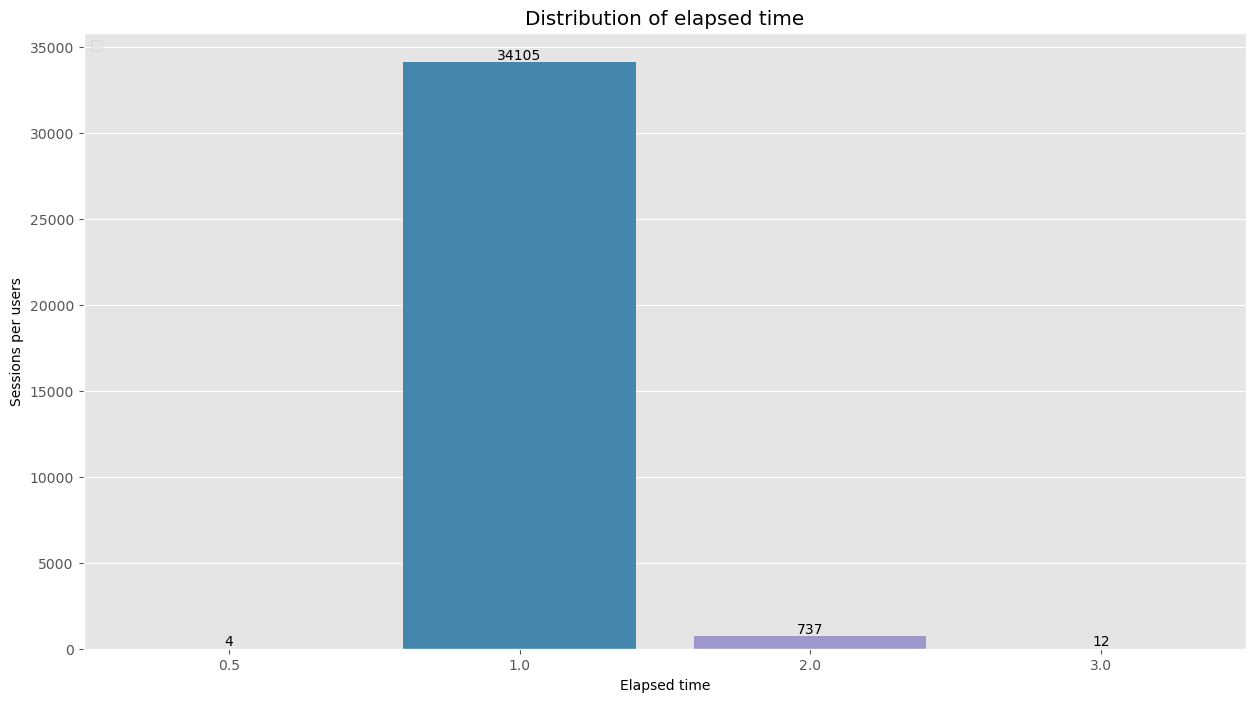

In [175]:
plt.style.use('ggplot')
ax = sns.barplot(data = df_filtered, x='time_per_user', y= 'first_session_month')
ax.set_xlabel("Elapsed time")
ax.set_ylabel("Sessions per users")

plt.title("Distribution of elapsed time") 
plt.rcParams['figure.figsize'] = [15, 8]
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ) 
plt.legend(loc='upper left')    

for i in ax.containers:
    ax.bar_label(i,)
plt.show()  
ax.figure.savefig('barplot_Distribution_of_elapsed_time2.png')

The average time between user registration and conversion is 1.02 months. From the graph it can be seen that for the majority of users the waiting time is 1 month, while there is a minority of users who take up to 3 months to make their purchase.

In [178]:
# ¿How many orders do you make during a given period of time?

sessions_grouped_by_purchase_date['purchase_year'] = sessions_grouped_by_purchase_date['date_of_purchase'].dt.year
sessions_grouped_by_purchase_date

,first_session_date,date_of_purchase,source_id,uid,first_session_month,purchase_month,time_in_between,purchase_year
0,2017-06-01 00:09:00,2017-06-01 00:10:00,1,1,6,6,-1 days +23:59:00,2017
1,2017-06-01 00:14:00,2017-06-01 00:25:00,1,1,6,6,-1 days +23:49:00,2017
2,2017-06-01 00:14:00,2017-06-01 00:29:00,1,1,6,6,-1 days +23:45:00,2017
3,2017-06-01 00:25:00,2017-06-01 00:27:00,1,1,6,6,-1 days +23:58:00,2017
4,2017-06-01 01:18:00,2017-07-21 14:56:00,4,1,6,7,-51 days +10:22:00,2017
...,...,...,...,...,...,...,...,...
36455,2018-05-31 23:26:00,2018-05-31 23:42:00,1,1,5,5,-1 days +23:44:00,2018
36456,2018-05-31 23:31:00,2018-05-31 23:36:00,1,1,5,5,-1 days +23:55:00,2018
36457,2018-05-31 23:35:00,2018-05-31 23:40:00,1,1,5,5,-1 days +23:55:00,2018
36458,2018-05-31 23:52:00,2018-05-31 23:54:00,1,1,5,5,-1 days +23:58:00,2018


In [181]:
dfg2 = sessions_grouped_by_purchase_date.groupby(['purchase_year', 'purchase_month'])['uid'].sum().reset_index()
dfg2

,purchase_year,purchase_month,uid
0,2017,6,2023
1,2017,7,1923
2,2017,8,1370
3,2017,9,2581
4,2017,10,4340
5,2017,11,4081
6,2017,12,4383
7,2018,1,3373
8,2018,2,3651
9,2018,3,3533


In [182]:
dfg = dfg2

In [183]:
dfg = dfg.drop(['purchase_year'], axis=1)
dfg

,purchase_month,uid
0,6,2023
1,7,1923
2,8,1370
3,9,2581
4,10,4340
5,11,4081
6,12,4383
7,1,3373
8,2,3651
9,3,3533


In [184]:
dfg = dfg.set_index(['purchase_month'])
dfg

,uid
purchase_month,
6,2023
7,1923
8,1370
9,2581
10,4340
11,4081
12,4383
1,3373
2,3651


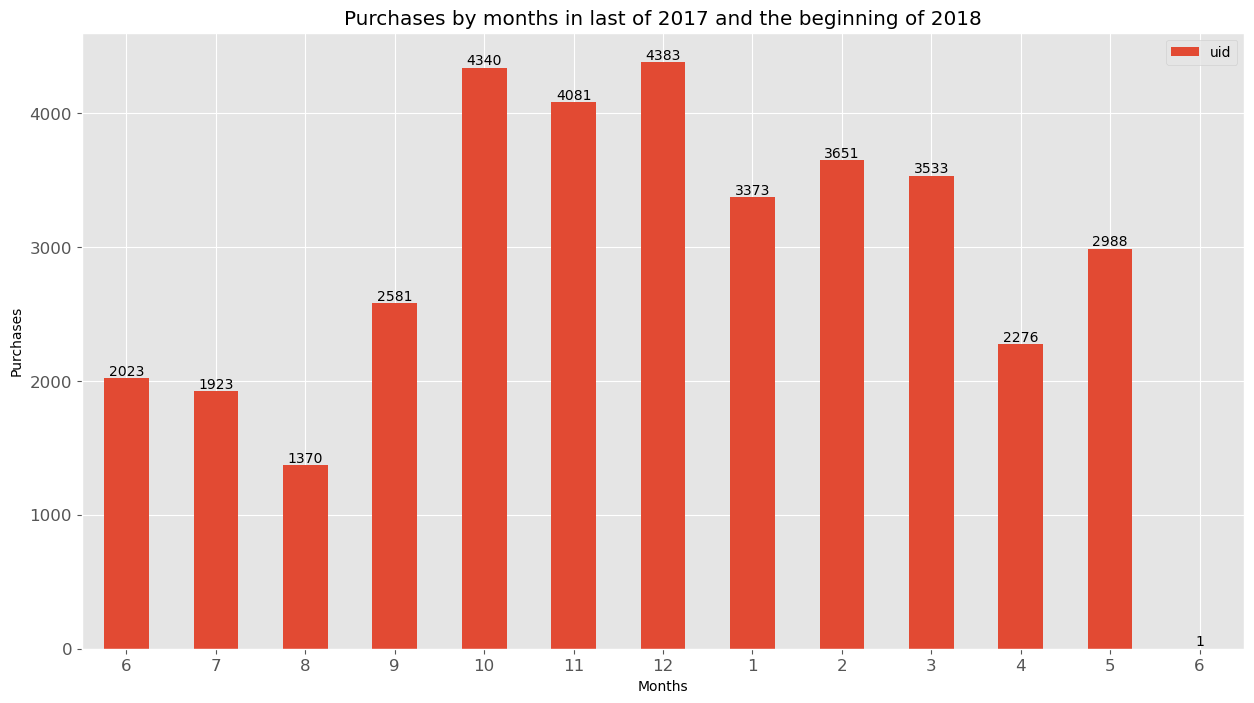

In [187]:
plt.style.use('ggplot')
ax = dfg[['uid']].plot(kind='bar', title ="Purchases by months in last of 2017 and the beginning of 2018",figsize=(15,8),legend=True, fontsize=12)

ax.set_xlabel("Months")
ax.set_ylabel("Purchases")

plt.rcParams['figure.figsize'] = [15, 8]
plt.xticks(rotation=0)
for i in ax.containers:
    ax.bar_label(i,)

plt.show()  
ax.figure.savefig('barplot_purchases_by_months_okeyy.png')

From the previous graph, in which the first 6 months correspond to 2017, the months of October and December 2017 saw the largest purchases, these being for a value of 4383, while in August of the same year for a value of 1370, this being the lower value.

In [188]:
# Find average purchases

dfg.mean()

uid    2809.461538
dtype: float64

Taking into account the data period available, on average, 2,809 monthly purchases are made.

In [197]:
# Finding the LTV score

#It is useful to find the LTV for different cohorts. Let's review what we have to do:
#1. find the date of each customer's first purchase;
#2. calculate the number of new customers for each date (or date range, in this case, for each month);
#3. add the month of the first order to the order table;
#4. group the table and calculate the income.

In [189]:
df_marketing_orders['order_month'] = df_marketing_orders['buy_ts'].dt.month
df_marketing_cost['month'] = df_marketing_cost['dt'].dt.month

first_orders = df_marketing_orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders.head() 

,uid,first_order_month
0,313578113262317,1
1,1575281904278712,6
2,2429014661409475,10
3,2464366381792757,1
4,2551852515556206,11


In [190]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head() 

,first_order_month,n_buyers
0,1,3898
1,2,4054
2,3,3856
3,4,2445
4,5,3194


In [191]:
df_marketing_orders_ = pd.merge(df_marketing_orders, first_orders, on='uid')
df_marketing_orders_.head() 

,buy_ts,revenue,uid,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,6,6
1,2017-06-01 00:25:00,0.55,11627257723692907447,6,6
2,2017-06-01 00:27:00,0.37,17903680561304213844,6,6
3,2017-06-01 00:29:00,0.55,16109239769442553005,6,6
4,2017-06-01 07:58:00,0.37,14200605875248379450,6,6


In [192]:
cohorts = df_marketing_orders_.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head() 

,first_order_month,order_month,revenue
0,1,1,19417.13
1,1,2,8275.63
2,1,3,7970.76
3,1,4,3697.85
4,1,5,2676.91


In [193]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head() 

,first_order_month,n_buyers,order_month,revenue
0,1,3898,1,19417.13
1,1,3898,2,8275.63
2,1,3898,3,7970.76
3,1,3898,4,3697.85
4,1,3898,5,2676.91


In [194]:
margin_rate = 0.4
report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M').astype('int64') 
report['age'] = report['age'].round().astype('int')
report.head() 

,first_order_month,n_buyers,order_month,revenue,gp,age
0,1,3898,1,19417.13,7766.852,0
1,1,3898,2,8275.63,3310.252,1
2,1,3898,3,7970.76,3188.304,2
3,1,3898,4,3697.85,1479.140,3
4,1,3898,5,2676.91,1070.764,4


In [195]:
report.tail(25) 

,first_order_month,n_buyers,order_month,revenue,gp,age
53,6,1865,9,294.79,117.916,3
54,6,1865,10,275.81,110.324,4
55,6,1865,11,222.68,89.072,5
56,6,1865,12,114.57,45.828,6
57,7,1796,7,10405.79,4162.316,0
58,7,1796,8,319.00,127.600,1
59,7,1796,9,436.92,174.768,2
60,7,1796,10,394.43,157.772,3
61,7,1796,11,139.95,55.980,4
62,7,1796,12,136.21,54.484,5


In [196]:
report['ltv'] = report['gp'] / report['n_buyers']
report['ltv']

0     1.992522
1     0.849218
2     0.817933
3     0.379461
4     0.274696
        ...   
73    0.120125
74    0.043303
75    2.021498
76    0.073619
77    1.766315
Name: ltv, Length: 78, dtype: float64

In [197]:
report

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv
0,1,3898,1,19417.13,7766.852,0,1.992522
1,1,3898,2,8275.63,3310.252,1,0.849218
2,1,3898,3,7970.76,3188.304,2,0.817933
3,1,3898,4,3697.85,1479.140,3,0.379461
4,1,3898,5,2676.91,1070.764,4,0.274696
...,...,...,...,...,...,...,...
73,10,4030,11,1210.26,484.104,1,0.120125
74,10,4030,12,436.28,174.512,2,0.043303
75,11,3742,11,18911.11,7564.444,0,2.021498
76,11,3742,12,688.71,275.484,1,0.073619


In [199]:
dfgg = report.groupby(['first_order_month','order_month'])['ltv'].sum().reset_index()
dfgg

,first_order_month,order_month,ltv
0,1,1,1.992522
1,1,2,0.849218
2,1,3,0.817933
3,1,4,0.379461
4,1,5,0.274696
...,...,...,...
73,10,11,0.120125
74,10,12,0.043303
75,11,11,2.021498
76,11,12,0.073619


Up to this point the LTV has been calculated.

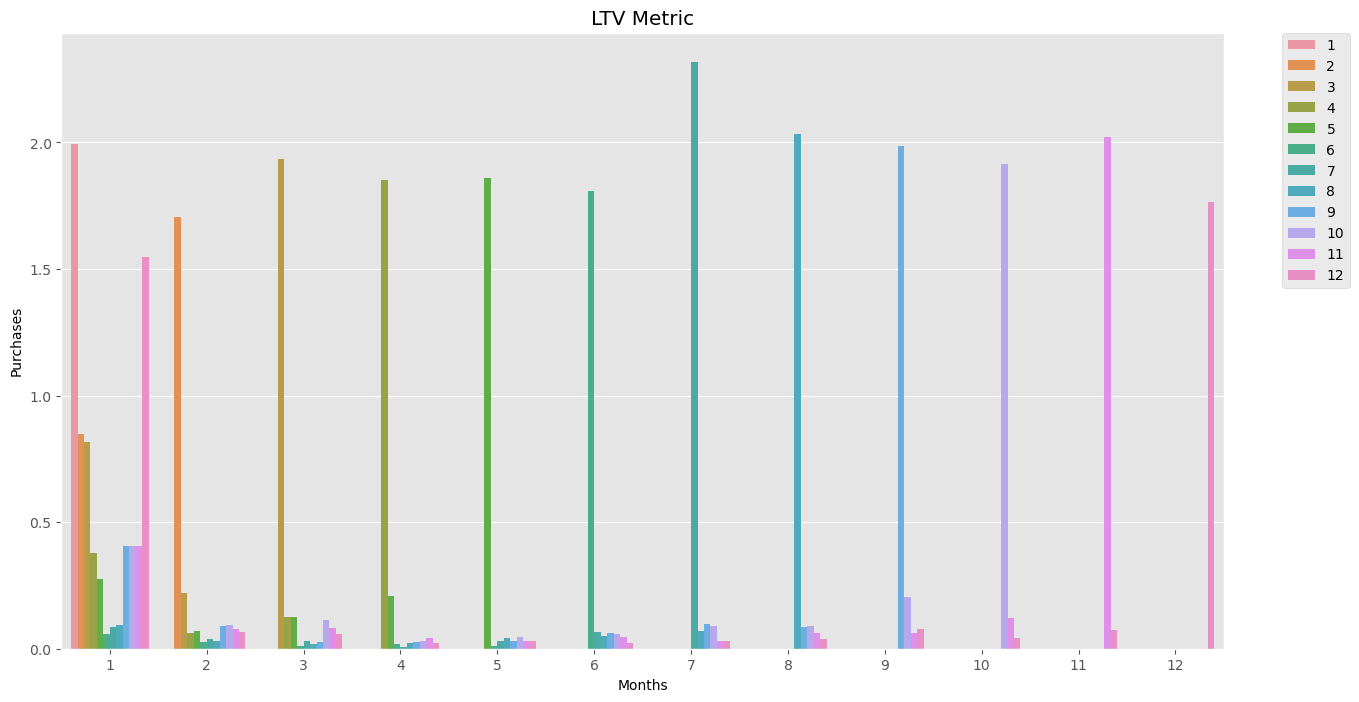

In [200]:
plt.style.use('ggplot')
ax = sns.barplot(data = dfgg, x='first_order_month', y= 'ltv', hue = 'order_month')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_xlabel("Months")
ax.set_ylabel("Purchases")
plt.title("LTV Metric") 

ax.figure.savefig('barplot_metric_LTV.png')

From the previous graph it is observed that the highest LTV corresponds to month 7, in which a value of 2,317 and 7 orders are registered, with 1,796 buyers, and it is the period in which the most money was contributed by clients.

### Marketing

In [201]:
# How much money was spent on marketing?

df_marketing_cost.tail(5)

,source_id,dt,costs,month
2537,10,2018-05-27,9.92,5
2538,10,2018-05-28,21.26,5
2539,10,2018-05-29,11.32,5
2540,10,2018-05-30,33.15,5
2541,10,2018-05-31,17.60,5


In [202]:
monthly_costs = df_marketing_cost.groupby(['source_id', 'month'])['costs'].sum()
df_marketing_cost['source_id'].nunique()

7

In [204]:
mis_booleans =  df_marketing_cost['source_id'] == 10
df_new = df_marketing_cost[mis_booleans].groupby(['month'])['costs'].sum().reset_index()
df_new

,month,costs
0,1,614.35
1,2,480.88
2,3,526.41
3,4,388.25
4,5,409.86
5,6,314.22
6,7,329.82
7,8,232.57
8,9,460.67
9,10,627.24


In [213]:
dfg = df_marketing_cost.groupby(['source_id', 'month'])['costs'].sum().reset_index()
dfg

,source_id,month,costs
0,1,1,2186.18
1,1,2,2204.48
2,1,3,1893.09
3,1,4,1327.49
4,1,5,1467.61
...,...,...,...
79,10,8,232.57
80,10,9,460.67
81,10,10,627.24
82,10,11,792.36


<Axes: title={'center': 'Costos totales por fuente de publicidad'}, xlabel='Cada fuente de publicidad por mes', ylabel='Costos'>

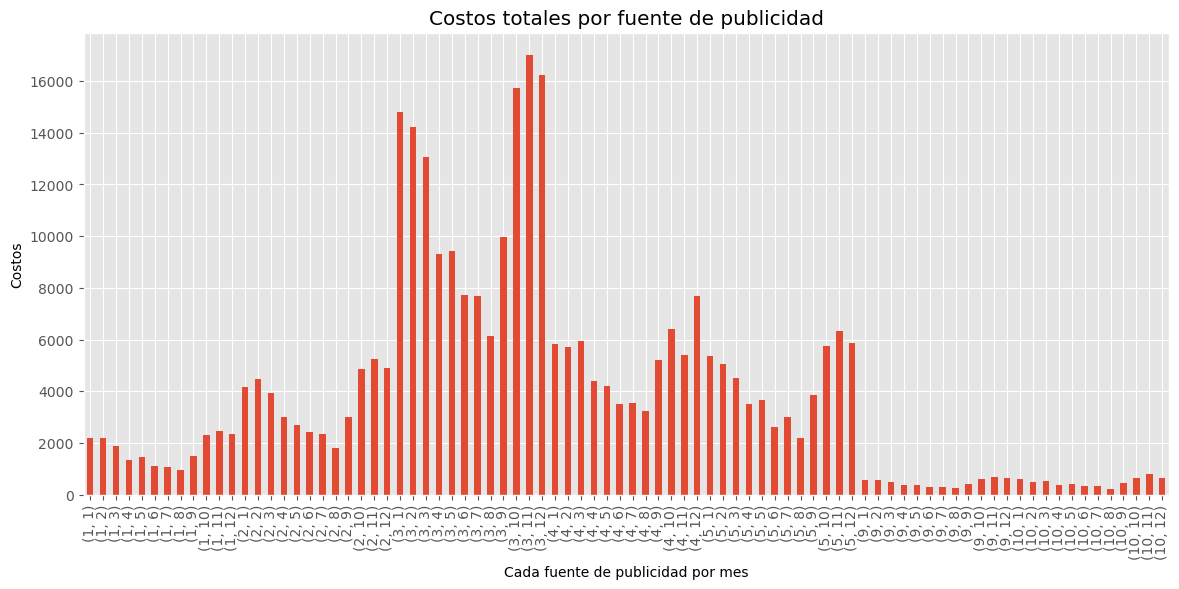

In [212]:
plt.style.use('ggplot')
dfg.plot(kind='bar', title='Costos totales por fuente de publicidad', ylabel='Costos', xlabel='Cada fuente de publicidad por mes', figsize=(14, 6))

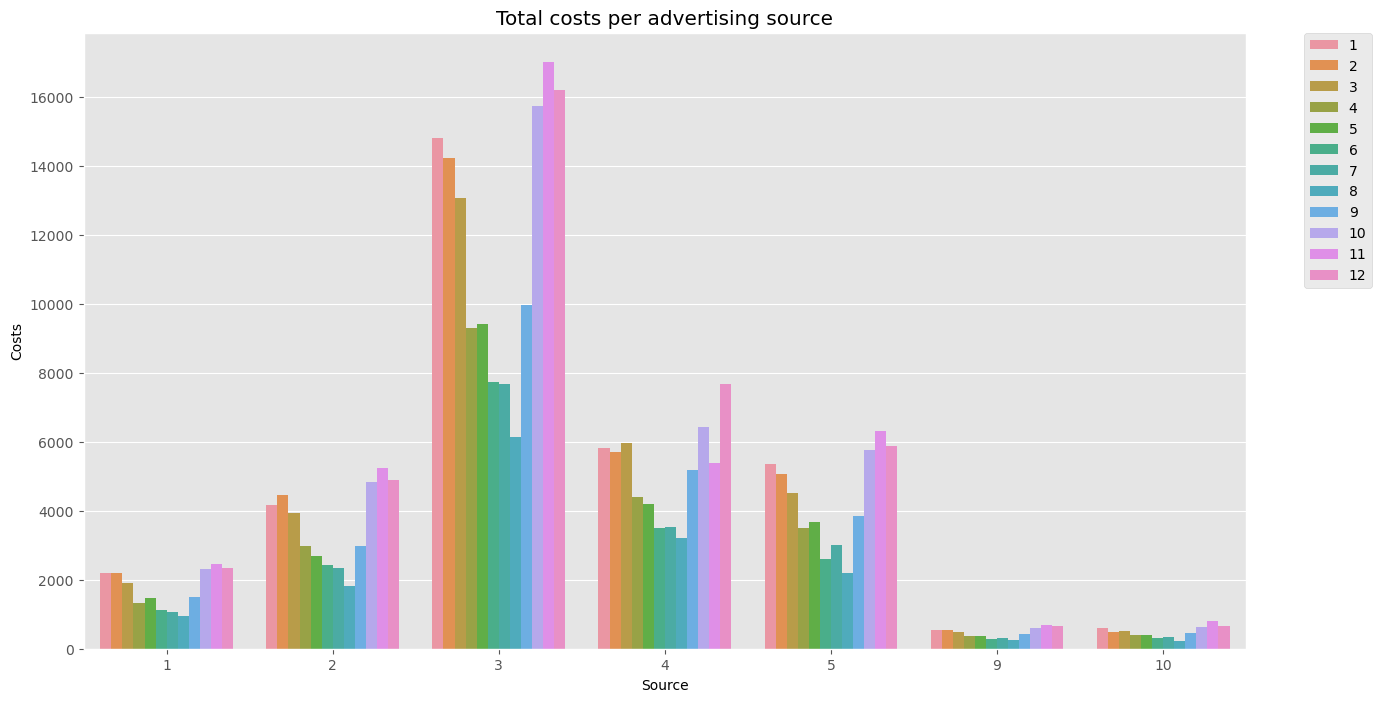

In [215]:
# Mejorando grafic anterior

ax = sns.barplot(data = dfg, x='source_id', y= 'costs', hue = 'month')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_xlabel("Source")
ax.set_ylabel("Costs")
plt.title("Total costs per advertising source") 

ax.figure.savefig('barplot_Total_costs_per_advertising_source.png')

It can be seen from the previous graph that of the 7 existing sources, number 3 is the one that includes the highest costs in the month of November for a value of 17025.34, while source 10 is the one with the lowest cost with 232.57

In [216]:
report_ = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_['cac'] = report_['costs'] / report_['n_buyers']
report_.head(5) 

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,costs,cac
0,1,3898,1,19417.13,7766.852,0,1.992522,2186.18,0.560847
1,1,3898,1,19417.13,7766.852,0,1.992522,4157.74,1.066634
2,1,3898,1,19417.13,7766.852,0,1.992522,14808.78,3.799071
3,1,3898,1,19417.13,7766.852,0,1.992522,5832.79,1.496355
4,1,3898,1,19417.13,7766.852,0,1.992522,5371.52,1.378019


In [218]:
result = report_.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean')
m6_cum_ltv = result.cumsum(axis=1).mean(axis=0)[5]

print('Average LTV over 6 months from first order:', m6_cum_ltv)

Average LTV over 6 months from first order: 2.5182494263523263


In [219]:
m7_cum_cac = result.cumsum(axis=1).mean(axis=0)[7]

print('The average CAC metric is:', m7_cum_cac)

The average CAC metric is: 2.6943813889818595


The LTV metric (or the acquisition of each customer) has a value of 2518.2, for its part, in the CAC metric the value of 2694.3 is obtained, and taking into account that it is desirable to have an LTV value greater than the CAC, which which would be indicative of a solid unit economy per client, then, in this particular case, it can be seen that there are some problems within the company, since acquiring a client is costing more than what the client contributed.       

In [220]:
# ROI calculation,
#You have to ROI = (net profit - investments) / investments
# In practice ROMI is calculated as gross profit / expenses

#report_['romi'] = report_['ltv'] / report_['cac']

# First the total invested by source is found

#report_['roi'] = report_['ltv'] / report_['cac']

dfg = df_marketing_cost.groupby(['source_id'])['costs'].sum()
dfg

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

In [221]:
# Second: income is found by source

#df_marketing_visits 
#df_marketing_orders['revenue'].sum()
df_marketing_orders['uid'].nunique()

36523

In [222]:
df_marketing_visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid', 'date_start',
       'session_week', 'year_start', 'month_start', 'session_date',
       'duration_session_min_end', 'duration_session_min_start',
       'duration_session', 'session_year', 'first_session_date',
       'date_of_purchase'],
      dtype='object')

In [223]:
df_marketing_orders.head(5)

,buy_ts,revenue,uid,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,6
1,2017-06-01 00:25:00,0.55,11627257723692907447,6
2,2017-06-01 00:27:00,0.37,17903680561304213844,6
3,2017-06-01 00:29:00,0.55,16109239769442553005,6
4,2017-06-01 07:58:00,0.37,14200605875248379450,6


In [224]:
df_marketing_visits['source_id'].nunique()

9

In [225]:
df_revenue_per_source = df_marketing_orders.merge(df_marketing_visits, on='uid', how='left')

df_revenue_per_source.columns
df_revenue_per_source.head(5)

,buy_ts,revenue,uid,order_month,device,end_ts,source_id,start_ts,date_start,session_week,year_start,month_start,session_date,duration_session_min_end,duration_session_min_start,duration_session,session_year,first_session_date,date_of_purchase
0,2017-06-01 00:10:00,17.00,10329302124590727494,6,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,2017-06-01,22,2017,6,1,11,9,2,2017,2017-06-01 00:09:00,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,6,desktop,2017-06-01 00:25:00,2,2017-06-01 00:14:00,2017-06-01,22,2017,6,1,25,14,11,2017,2017-06-01 00:14:00,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,6,desktop,2017-06-01 00:34:00,2,2017-06-01 00:25:00,2017-06-01,22,2017,6,1,34,25,9,2017,2017-06-01 00:25:00,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,6,desktop,2017-06-01 00:33:00,2,2017-06-01 00:14:00,2017-06-01,22,2017,6,1,33,14,19,2017,2017-06-01 00:14:00,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,6,desktop,2017-06-01 07:59:00,3,2017-06-01 07:31:00,2017-06-01,22,2017,6,1,59,31,28,2017,2017-06-01 07:31:00,2017-06-01 07:58:00


In [288]:
dfg1 = df_revenue_per_source.groupby(['source_id'])['revenue'].sum()
dfg1

source_id
1     2298200.17
2     2638189.21
3      296687.96
4      496690.17
5     1181477.14
7           1.22
9       36342.25
10      14619.23
Name: revenue, dtype: float64

In [299]:
data = {'revenue': dfg1,
        'all_cost': dfg}

df_roi = pd.DataFrame(data)
df_roi 

,revenue,all_cost
source_id,,
1,2298200.17,20833.27
2,2638189.21,42806.04
3,296687.96,141321.63
4,496690.17,61073.60
5,1181477.14,51757.10
7,1.22,NaN
9,36342.25,5517.49
10,14619.23,5822.49


In [300]:
df_roi = df_roi.reset_index()
df_roi

,source_id,revenue,all_cost
0,1,2298200.17,20833.27
1,2,2638189.21,42806.04
2,3,296687.96,141321.63
3,4,496690.17,61073.60
4,5,1181477.14,51757.10
5,7,1.22,NaN
6,9,36342.25,5517.49
7,10,14619.23,5822.49


In [301]:
df_roi['roi'] = (df_roi['revenue'] -  df_roi['all_cost']) /df_roi['all_cost']
df_roi

,source_id,revenue,all_cost,roi
0,1,2298200.17,20833.27,109.313944
1,2,2638189.21,42806.04,60.631237
2,3,296687.96,141321.63,1.099381
3,4,496690.17,61073.60,7.132649
4,5,1181477.14,51757.10,21.827344
5,7,1.22,NaN,NaN
6,9,36342.25,5517.49,5.586736
7,10,14619.23,5822.49,1.510821


In [302]:
df_roi.columns

Index(['source_id', 'revenue', 'all_cost', 'roi'], dtype='object')

In [303]:
df_roi['all_cost'] = df_roi['all_cost'].fillna(0)

In [304]:
df_roi['roi'] = df_roi['roi'].fillna(0)

In [311]:
df_roi= df_roi.round(2) 

In [312]:
df_roi

,source_id,revenue,all_cost,roi
0,1,2298200.17,20833.27,109.31
1,2,2638189.21,42806.04,60.63
2,3,296687.96,141321.63,1.10
3,4,496690.17,61073.60,7.13
4,5,1181477.14,51757.10,21.83
5,7,1.22,0.00,0.00
6,9,36342.25,5517.49,5.59
7,10,14619.23,5822.49,1.51


Looking at the table above, it can be seen that the first source has the highest Return on Marketing Investment (ROI) in the company, which is better illustrated in the following graph.

<Axes: title={'center': 'Investment Return Behavior'}, xlabel='Sources', ylabel='Input'>

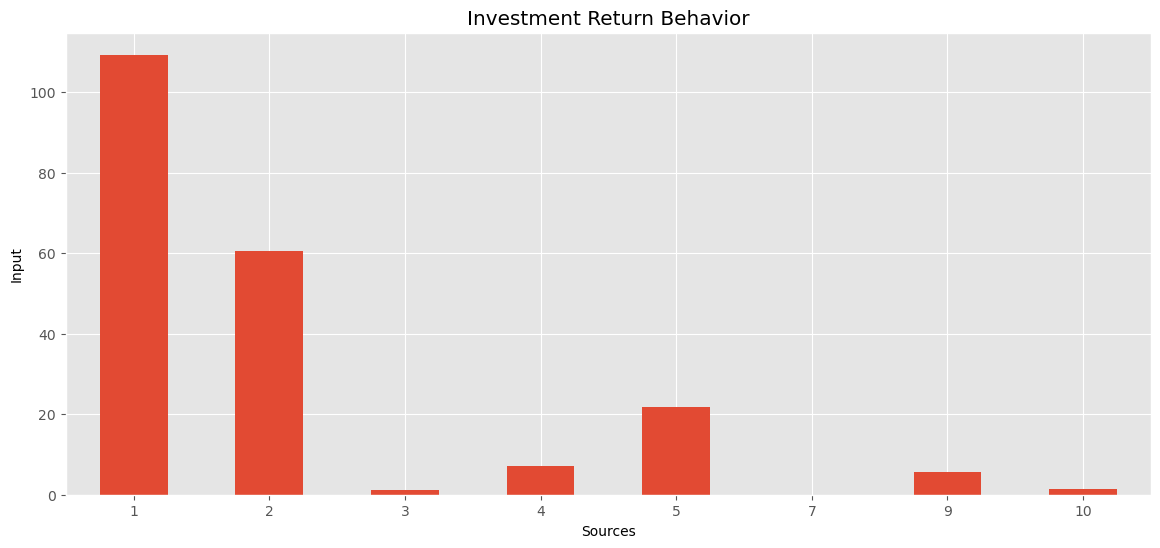

In [233]:
# Showing differences by ad sources

plt.style.use('ggplot')
df_roi['roi'].plot(kind='bar', rot=0, title='Investment Return Behavior', ylabel='Input', xlabel='Sources', figsize=(14, 6))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


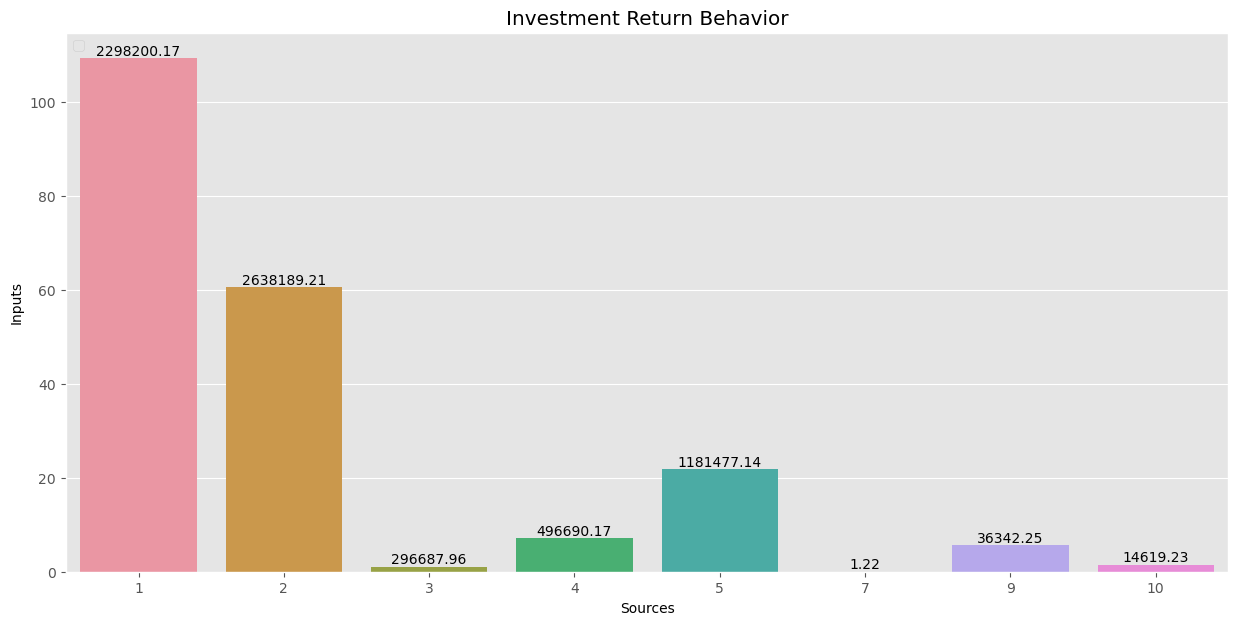

In [314]:
plt.style.use('ggplot')

ax = sns.barplot(data = df_roi, x='source_id', y= 'roi')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=0)
ax.set_xlabel("Sources")
ax.set_ylabel("Inputs")
plt.title("Investment Return Behavior") 
plt.rcParams['figure.figsize'] = [15, 7]
plt.legend(loc='upper left')
ax.bar_label(ax.containers[0], labels=df_roi['revenue'])

plt.show()
ax.figure.savefig('barplot_investment_return_behavior_okeyyyy.png')

In [232]:
# Showing differences by devices

dfg1 = df_revenue_per_source.groupby(['device'])['revenue'].sum()
dfg1

device
desktop    6447893.99
touch       514313.36
Name: revenue, dtype: float64

In [319]:
df_revenue_per_source.head(5)

,buy_ts,revenue,uid,order_month,device,end_ts,source_id,start_ts,date_start,session_week,year_start,month_start,session_date,duration_session_min_end,duration_session_min_start,duration_session,session_year,first_session_date,date_of_purchase
0,2017-06-01 00:10:00,17.00,10329302124590727494,6,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,2017-06-01,22,2017,6,1,11,9,2,2017,2017-06-01 00:09:00,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,6,desktop,2017-06-01 00:25:00,2,2017-06-01 00:14:00,2017-06-01,22,2017,6,1,25,14,11,2017,2017-06-01 00:14:00,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,6,desktop,2017-06-01 00:34:00,2,2017-06-01 00:25:00,2017-06-01,22,2017,6,1,34,25,9,2017,2017-06-01 00:25:00,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,6,desktop,2017-06-01 00:33:00,2,2017-06-01 00:14:00,2017-06-01,22,2017,6,1,33,14,19,2017,2017-06-01 00:14:00,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,6,desktop,2017-06-01 07:59:00,3,2017-06-01 07:31:00,2017-06-01,22,2017,6,1,59,31,28,2017,2017-06-01 07:31:00,2017-06-01 07:58:00


NOTE: It is specified that the profit margin used to calculate the LTV was 40%

## Observations and recommendations <a name="observations"></a>

After the results obtained from the calculated metrics, the following recommendations are reached:

1. Source 1 is the one that has the best performance in the ROI metric, therefore, better profitability of investment in marketing, after which it is recommended to place emphasis on this source to continue developing it, while source 7 showed the lowest profitability of all.

2. The average time between user registration and conversion is 1.02 months.

3. Additionally, it was observed that of the 7 existing sources, number 3 is the one that includes the highest costs in the month of November for a value of 17025.34, while source 10 is the one with the lowest cost with 232.57

4. In terms of sales, the highest customer lifetime value, or LTV, occurred in month 7 with 7 orders.

5. It was obtained that the LTV metric has a value of 2518.2, and for the CAC metric the value of 2694.3 is obtained, which is not desirable, because acquiring a customer is costing more than what they contribute, so it is recommended to decrease acquisition costs per customer.

6. From the ROI metric, it can be seen that the first source has the highest Return on marketing investment (ROI) in the company worth 109.3

## Conclusion <a name="conclusion"></a>

After analyzing all the metrics, it is concluded that the company must prioritize and focus its attention on source 1 since:
-has the best performance in the ROI indicator
-in terms of costs

As a general recommendation, you should evaluate carrying out advertising campaigns in the month of October and December, given that they are the months with the highest volume of customer purchases, or carry out the advertising campaign in the previous month to motivate and awaken interest in the client and achieving product positioning. In addition, the ad source 1. must continue to be developed, which is the one that has a favorable relationship between the Profitability (ROI) metric and the cost.